# **Task D1**
## Analyzing YouTube Video Data from News Publishers

##### This task focuses on analyzing YouTube videos about a news topic (e.g., Covid-19) published by at least 4 English news publishers (e.g., BBC, Fox News, ...) from a start date to an end date. You will need to specify the news topic and the list of keywords to search for the videos about that topic on YouTube. Also, you will need to extract the channel IDs of the news publishers using the function get_channel_info() given to you in the attached "collect.ipynb" file. All settings need to be specified in Section B (Settings) of "collect.ipynb" and also copied into Section B (Settings) of this jupyter notebook (D1.ipynb). Please note the terms "News Publisher" and "Channel" have been used interchangeably in this task (each news publisher has a channel - if a news publisher has more than one channels on YouTube, pick any and state that in your TaskCompletionReport). The following instructions convey important information about the task. Please **read them carefully** and complete the task. If you need any clarification please    
<img src="youtube.png" alt="SIT112 Avocado!" width="1800" height="200">

### A. Instructions
#### Attachments
* directions.pdf
* collect.ipynb
* credentials-sample.ini
* video-presentation-guideline.pdf

#### Get Started 
1. Rename the "credentials-sample.ini" file to "credentials.ini" and follow the instructions. 
2. Creat your YouTube API key and assign it to developer_key in the credentials.ini file. You will need the YouTube API key to get access to the YouTube API (collect the data). See the following video: https://youtu.be/N18czV5tj5o (the video is not up to date; the instrucitons might be sighly different. You can view the following link for more details: https://developers.google.com/youtube/v3/getting-started). Please note Projects that enable the YouTube Data API have a default quota allocation of 10,000 units per day; to make an efficient use of your quota, please avoid multiple excecutions of the "collect.ipynb" file: https://developers.google.com/youtube/v3/guides/quota_and_compliance_audits. 
3. To work with the YouTube API (send queries), you need to install Google API Python Client using: "conda install google-api-python-client" 
#### Specify the news topic and news publishers (channels)
4. Choose a news topic (e.g., Covid-19) and a list of keywords to be used for finding videos about that topic. You can extract the keywords by looking at some sample video titles. 
5. Choose at least 4 popular English news publishers (e.g., BBC, Fox News).
6. Extract, manually, the video IDs of sample videos from different  news publishers (channels). You can do so by clicking on the share button for each video. 
7. Extract the Channel IDs of the videos using the get_channel_info() function in collect.ipynb 
#### Collect the Videos and Comments using "collect.ipynb" 
8. Specify the Channel IDs and names in the Settings section of the attached "collect.ipynb" file (CHANNELS = {...})
9. Specify the list keywords in the Settings section of the attached collect.ipynb file (KEYWORDS = [...])
10. Specify the START_DATE and END_DATE in the Settings section of the attached collect.ipynb file
11. Specify the MAX_VIDEOS such that you can extract **at least 20 videos per news publisher (channel)**. Make sure for your specified topic, **at least 300 comments per news publisher (channel)** can be collected. Please note some publishers might have disabled comments.
12. Please **do not make any changes to the "collect.ipynb" file**
13. Execute the collect.ipynb file to collect the videos (will be stored in videos.csv) and the comments on those videos (will be stored in comments.csv).
#### Complete the Task
14. <font color='red'> Choose only 2 quesitons from Section E1 and only 1 quesiton from Section E2 </font> and answer them based on the hints. Please note, for each question, you must **briefly discuss your observations** based on the results.
15. Please note **there is no unique solution** for most questions; if you need to make any assumptions, **state your assumptions** in the comments and in your TaskCompletionReport and answer the question accordingly. Please also note, **if something has not been clearly stated in a question (e.g., the type of visualization, etc) it means you are allowed to make your own choice**. 
16. **Read the attached "video-presentation-guideline.pdf"** carefully and record a video clip (based on video-presentation-guideline.pdf) that presents your completed task. Upload the video on a video repository such as YouTube (or any other preferred repository) and provide the link in the TaskCompletionReport. 
17. Complete the TaskCompletionReport form.

#### Submit the Task
18. Please make sure you have copied the settings from collect.ipynb into your solution file (D1.ipynb), under section B (settings).  
19. Please make sure you have executed and saved all the cells in your jupyter notebook without any error; otherwise, your submission may not be flagged as complete. 
20. Please make sure you have included the link to the video recording of your presentation in your TaskCompletionReport. 
21. Submit (1) the TaskCompletionReport as a "PDF" file and (2) your solution file (D1.ipynb) as an "ipynb" file (do not zip/combine them). Please do not include "collect.ipynb" in your submission. 

Good luck :)

### B. Settings
Copy your settings from Section B of the "collect.ipynb" file below. 

In [1]:
# VIDEOS_FILE = "videos.csv"
# COMMENTS_FILE = "comments.csv"
# CREDENTIALS_FILE = 'credentials.ini'
# START_DATE = datetime(2020, 1, 1)
# END_DATE = datetime(2023, 1, 1)
# KEYWORDS =['coronavirus', 'covid', 'covid-19', 'pandemic']
# # You can use functin get_channel_info() to extract the channel ID of a sample video from a news publisher ...
# CHANNELS = {
#     'UCXIJgqnII2ZOINSWNOGFThA' : 'Fox News',
#     'UC16niRr50-MSBwiO3YDb3RA' : 'BBC News',
#     'UCupvZG-5ko_eiXAupbDfxWw' : 'CNN',
#     'UCaXkIU1QidjPwiAYu6GcHjg' : 'MSNBC'
# }
# MAX_VIDEOS = 50 # the maximum number of video that should be returned for each request. Acceptable values are 0 to 50
# QUERY= f"intitle:{','.join(KEYWORDS)}"

### C. Imports
You need to import the following libraries. Install the libraries using "conda install ... or pip install ..." if they have not been installed on your machine. For example you can install google api python client by executing "conda install google-api-python-client"

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from datetime import datetime
import os
from configparser import ConfigParser
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from langdetect import detect
import langdetect
from textblob import TextBlob
import calendar
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from prettytable import PrettyTable
from tabulate import tabulate
import numpy as np
from collections import defaultdict
import warnings
#from pandas.core.common import SettingWithCopyWarning
# Ignore the warning
warnings.filterwarnings('ignore')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1028)>


### D. Clean and Prepare the Data

##### D.1. Write Python code that cleans the data for analyzing the videos and comments.

In [3]:
# a basic data cleaning has been performed on the collected data by the clean_data()function in collect.ipynb
# additionl data cleaning can be added here - if needed 

comment_data = pd.read_csv('comments.csv')
video_data = pd.read_csv('videos.csv') #Read the csv's.
 

In [4]:
comment_data.head(10) #Get a basic idea of the data

,video_id,comment_id,comment_text,comment_author,comment_date,comment_like_count,parent_comment_id
0,d1eEWihvwpQ,UgzZ6fvV9JGsvh0159p4AaABAg,hello 5 years later,@Bobherry,2025-03-10T23:40:26Z,0,NaN
1,d1eEWihvwpQ,UgxmZNK1ZIj5jMBUemZ4AaABAg,Permanently messed up my sense of time,@radioactivebeverage,2024-03-15T01:47:38Z,2,NaN
2,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg,I had COVID-19 in August and it was Super Unpl...,@rosieasmrwhispererzephier7021,2022-10-11T02:46:38Z,0,NaN
3,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg.9h1A5EF38D69wxn0x1JQlS,@@showline8303much better I also had Influenza...,@rosieasmrwhispererzephier7021,2023-11-11T02:21:41Z,0,UgxbTG_0cWGvMAee0sx4AaABAg
4,d1eEWihvwpQ,UgzBGHRwVHq4rkAa4AZ4AaABAg,"This happened on March 26, 2020. That is when...",@danhobson24,2022-06-08T21:53:44Z,0,NaN
5,d1eEWihvwpQ,Ugy03Fu2_XAUTUUsHtB4AaABAg,It's been a year :(,@monsehere8090,2021-03-14T15:29:55Z,2,NaN
6,d1eEWihvwpQ,Ugy03Fu2_XAUTUUsHtB4AaABAg.9KsNZhCLLuv9Qzry2OY6ej,:(,@kobimansaray,2021-08-13T16:27:18Z,0,Ugy03Fu2_XAUTUUsHtB4AaABAg
7,d1eEWihvwpQ,UgyNQj-9Y4fq6TXadaJ4AaABAg,"Why is fox news repeatedly reporting on ""new c...",@tonytony6912,2020-07-04T22:14:22Z,1,NaN
8,d1eEWihvwpQ,UgyvO3i6UgtuSiMj8VF4AaABAg,You spread the news🦋💕🧚🏻now ✨stop✨,@arianaecall,2020-06-25T02:01:25Z,0,NaN
9,d1eEWihvwpQ,UgzsnLxvGIf4zKr2HUN4AaABAg,Trump is killing the USA!,@tjeerdbeem,2020-05-23T08:01:17Z,1,NaN


In [5]:
video_data.head(10) #Get a basic idea of the data.

,video_id,channel_id,video_title,channel_title,category_name,live_upcoming_none,view_count,like_count,dislike_count,comment_count,published_at,tags,duration,definition,caption,thumbnail,url
0,d1eEWihvwpQ,UCXIJgqnII2ZOINSWNOGFThA,who declares coronavirus outbreak a pandemic,Fox News,News & Politics,none,457860,3617,0,1901,2020-03-11T16:50:56Z,"fox news alert,breaking news,fox,news,fox news...",PT51S,hd,True,https://i.ytimg.com/vi/d1eEWihvwpQ/default.jpg,https://www.youtube.com/watch?v=d1eEWihvwpQ
1,0pkwjVhq230,UCXIJgqnII2ZOINSWNOGFThA,coronavirus pandemic questions answered part,Fox News,News & Politics,none,45006,415,0,124,2020-03-16T18:18:47Z,"Fox News Channel,Fox News,News,FNC,harris faul...",PT4M11S,hd,True,https://i.ytimg.com/vi/0pkwjVhq230/default.jpg,https://www.youtube.com/watch?v=0pkwjVhq230
2,zwX5z_BvaN4,UCXIJgqnII2ZOINSWNOGFThA,coronavirus pandemic questions answered part,Fox News,News & Politics,none,43193,634,0,179,2020-03-16T18:12:18Z,"Fox News Channel,Fox News,News,FNC,outnumbered...",PT7M33S,hd,True,https://i.ytimg.com/vi/zwX5z_BvaN4/default.jpg,https://www.youtube.com/watch?v=zwX5z_BvaN4
3,6G_-qe0iMBs,UCXIJgqnII2ZOINSWNOGFThA,coronavirus pandemic questions answered part,Fox News,News & Politics,none,41458,397,0,170,2020-03-16T18:24:00Z,"Fox News Channel,Fox News,News,FNC,harris faul...",PT4M21S,hd,True,https://i.ytimg.com/vi/6G_-qe0iMBs/default.jpg,https://www.youtube.com/watch?v=6G_-qe0iMBs
4,xhpqX1NbusQ,UCXIJgqnII2ZOINSWNOGFThA,coronavirus pandemic questions answered part,Fox News,News & Politics,none,39517,498,0,282,2020-03-16T18:25:52Z,"Fox News Channel,Fox News,News,FNC,harris faul...",PT5M50S,hd,True,https://i.ytimg.com/vi/xhpqX1NbusQ/default.jpg,https://www.youtube.com/watch?v=xhpqX1NbusQ
5,lJcjFGt9eQM,UCXIJgqnII2ZOINSWNOGFThA,coronavirus pandemic questions answered part,Fox News,News & Politics,none,185803,2432,0,929,2020-03-16T18:00:09Z,"Fox News Channel,Fox news,News,FNC,outnumbered...",PT9M49S,hd,True,https://i.ytimg.com/vi/lJcjFGt9eQM/default.jpg,https://www.youtube.com/watch?v=lJcjFGt9eQM
6,bf4WRdPnf4I,UCXIJgqnII2ZOINSWNOGFThA,gym owners reflect on coronavirus pandemic one...,Fox News,News & Politics,none,9178,285,0,135,2021-03-16T11:15:03Z,"coronavirus,coronavirus pandemic,COVID-19,smal...",PT5M18S,hd,True,https://i.ytimg.com/vi/bf4WRdPnf4I/default.jpg,https://www.youtube.com/watch?v=bf4WRdPnf4I
7,2j3YtPVBT30,UCXIJgqnII2ZOINSWNOGFThA,ny gov cuomo talks rent payments coronavirus c...,Fox News,News & Politics,none,84924,537,0,542,2020-03-30T18:00:34Z,"Fox News Channel,FNC,Fox News,News,Latest News...",PT37M54S,hd,False,https://i.ytimg.com/vi/2j3YtPVBT30/default.jpg,https://www.youtube.com/watch?v=2j3YtPVBT30
8,76J7SqZXG1g,UCXIJgqnII2ZOINSWNOGFThA,coronavirus pandemic questions answered part,Fox News,News & Politics,none,30932,402,0,124,2020-03-16T18:22:44Z,"Fox News Channel,Fox News,News,FNC,harris faul...",PT7M42S,hd,True,https://i.ytimg.com/vi/76J7SqZXG1g/default.jpg,https://www.youtube.com/watch?v=76J7SqZXG1g
9,hIpCSt6NUJg,UCXIJgqnII2ZOINSWNOGFThA,ingraham what we still dont know about coronav...,Fox News,News & Politics,none,289283,6351,0,1894,2020-03-18T03:40:19Z,"Fox News Channel,Fox News,News,opinion,the ing...",PT8M9S,hd,True,https://i.ytimg.com/vi/hIpCSt6NUJg/default.jpg,https://www.youtube.com/watch?v=hIpCSt6NUJg


In [6]:
comment_data.info(verbose=True) #Check for na's and other issues.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4378 entries, 0 to 4377
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   video_id            4378 non-null   object
 1   comment_id          4378 non-null   object
 2   comment_text        4378 non-null   object
 3   comment_author      4373 non-null   object
 4   comment_date        4378 non-null   object
 5   comment_like_count  4378 non-null   int64 
 6   parent_comment_id   501 non-null    object
dtypes: int64(1), object(6)
memory usage: 239.6+ KB


In [7]:
video_data.info(verbose=True) #Check for na's and other issues.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   video_id            200 non-null    object
 1   channel_id          200 non-null    object
 2   video_title         200 non-null    object
 3   channel_title       200 non-null    object
 4   category_name       200 non-null    object
 5   live_upcoming_none  200 non-null    object
 6   view_count          200 non-null    int64 
 7   like_count          200 non-null    int64 
 8   dislike_count       200 non-null    int64 
 9   comment_count       200 non-null    int64 
 10  published_at        200 non-null    object
 11  tags                200 non-null    object
 12  duration            200 non-null    object
 13  definition          200 non-null    object
 14  caption             200 non-null    bool  
 15  thumbnail           200 non-null    object
 16  url                 200 no

In [8]:
comment_data['parent_comment_id'].isna()

0        True
1        True
2        True
3       False
4        True
        ...  
4373     True
4374     True
4375     True
4376     True
4377     True
Name: parent_comment_id, Length: 4378, dtype: bool

In [9]:
comment_data.drop(columns= ['parent_comment_id'], inplace=True)
comment_data.head()


,video_id,comment_id,comment_text,comment_author,comment_date,comment_like_count
0,d1eEWihvwpQ,UgzZ6fvV9JGsvh0159p4AaABAg,hello 5 years later,@Bobherry,2025-03-10T23:40:26Z,0
1,d1eEWihvwpQ,UgxmZNK1ZIj5jMBUemZ4AaABAg,Permanently messed up my sense of time,@radioactivebeverage,2024-03-15T01:47:38Z,2
2,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg,I had COVID-19 in August and it was Super Unpl...,@rosieasmrwhispererzephier7021,2022-10-11T02:46:38Z,0
3,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg.9h1A5EF38D69wxn0x1JQlS,@@showline8303much better I also had Influenza...,@rosieasmrwhispererzephier7021,2023-11-11T02:21:41Z,0
4,d1eEWihvwpQ,UgzBGHRwVHq4rkAa4AZ4AaABAg,"This happened on March 26, 2020. That is when...",@danhobson24,2022-06-08T21:53:44Z,0


In [10]:
comment_data.duplicated().any()

np.False_

In [11]:
video_data.duplicated().any() #No duplicates found in either df. We are good to go.

np.False_

##### D.2. Write Python code that prepares the data for analyzing the videos and comments.

In [12]:
# A sample code for data preparation has been given below. Feel free to edit when needed

# Load the videos and comments dataframes from their respective CSV files
videos_df = pd.read_csv('videos.csv')
comments_df = pd.read_csv('comments.csv')

# Convert the published_at column to a datetime object for videos_df
videos_df['published_at'] = pd.to_datetime(videos_df['published_at'], format='%Y-%m-%dT%H:%M:%SZ')

# Create a new column that contains the published_at weekly
videos_df['published_at_week'] = videos_df['published_at'].dt.strftime('%Y-%m-%W')

# Create a new column that contains the published_at monthly
videos_df['published_at_month'] = videos_df['published_at'].dt.strftime('%Y-%m')

# Create a new column that contains the published_at monthly
videos_df['published_at_year'] = videos_df['published_at'].dt.strftime('%Y')

# Convert the published_at column to a datetime object for comments_df
comments_df['comment_date'] = pd.to_datetime(comments_df['comment_date'], format='%Y-%m-%dT%H:%M:%SZ')

# Create a new column that contains the published_at weekly
comments_df['comment_date_week'] = comments_df['comment_date'].dt.strftime('%Y-%m-%W')

# Create a new column that contains the published_at monthly
comments_df['comment_date_month'] = comments_df['comment_date'].dt.strftime('%Y-%m')

# Create a new column that contains the published_at monthly
comments_df['comment_date_year'] = comments_df['comment_date'].dt.strftime('%Y')

# Convert the duration column to seconds for videos_df
videos_df['duration'] = videos_df['duration'].apply(lambda x: re.findall(r'PT(\d+)M(\d+)S', x))
videos_df['duration'] = videos_df['duration'].apply(lambda x: int(x[0][0]) * 60 + int(x[0][1]) if len(x) > 0 else 0)

# Prepared DataFrame objects; can be used for data analysis
videos = videos_df.copy(deep=True)
comments = comments_df.copy(deep=True)
videos_comments_inner = pd.merge(videos,comments, on='video_id', how = 'inner') # merged videos and comments
videos_comments_left = pd.merge(videos,comments, on='video_id', how = 'left') # left-merged videos and comments

In [13]:
videos.head()

,video_id,channel_id,video_title,channel_title,category_name,live_upcoming_none,view_count,like_count,dislike_count,comment_count,published_at,tags,duration,definition,caption,thumbnail,url,published_at_week,published_at_month,published_at_year
0,d1eEWihvwpQ,UCXIJgqnII2ZOINSWNOGFThA,who declares coronavirus outbreak a pandemic,Fox News,News & Politics,none,457860,3617,0,1901,2020-03-11 16:50:56,"fox news alert,breaking news,fox,news,fox news...",0,hd,True,https://i.ytimg.com/vi/d1eEWihvwpQ/default.jpg,https://www.youtube.com/watch?v=d1eEWihvwpQ,2020-03-10,2020-03,2020
1,0pkwjVhq230,UCXIJgqnII2ZOINSWNOGFThA,coronavirus pandemic questions answered part,Fox News,News & Politics,none,45006,415,0,124,2020-03-16 18:18:47,"Fox News Channel,Fox News,News,FNC,harris faul...",251,hd,True,https://i.ytimg.com/vi/0pkwjVhq230/default.jpg,https://www.youtube.com/watch?v=0pkwjVhq230,2020-03-11,2020-03,2020
2,zwX5z_BvaN4,UCXIJgqnII2ZOINSWNOGFThA,coronavirus pandemic questions answered part,Fox News,News & Politics,none,43193,634,0,179,2020-03-16 18:12:18,"Fox News Channel,Fox News,News,FNC,outnumbered...",453,hd,True,https://i.ytimg.com/vi/zwX5z_BvaN4/default.jpg,https://www.youtube.com/watch?v=zwX5z_BvaN4,2020-03-11,2020-03,2020
3,6G_-qe0iMBs,UCXIJgqnII2ZOINSWNOGFThA,coronavirus pandemic questions answered part,Fox News,News & Politics,none,41458,397,0,170,2020-03-16 18:24:00,"Fox News Channel,Fox News,News,FNC,harris faul...",261,hd,True,https://i.ytimg.com/vi/6G_-qe0iMBs/default.jpg,https://www.youtube.com/watch?v=6G_-qe0iMBs,2020-03-11,2020-03,2020
4,xhpqX1NbusQ,UCXIJgqnII2ZOINSWNOGFThA,coronavirus pandemic questions answered part,Fox News,News & Politics,none,39517,498,0,282,2020-03-16 18:25:52,"Fox News Channel,Fox News,News,FNC,harris faul...",350,hd,True,https://i.ytimg.com/vi/xhpqX1NbusQ/default.jpg,https://www.youtube.com/watch?v=xhpqX1NbusQ,2020-03-11,2020-03,2020


### E. Analyze the Videos and Comments

Please note you must **discuss your observations** for each question, in addition to the python code. 

#### E.1. Analyze the Videos and Comments - Part 1
* Choose **(only) 2** of the following questions (E.1.1 to E.1.7) and write Python code to answer them. 

##### E.1.1 Compare the distributions of the number of views, likes, and comments for the videos. Use visualization and discuss your observations. Your visualization must include three subplots, one for each variable (number of views, number of likes, number of comments), and each subplot must display a histogram of the respective variable overlayed by a kernel density function. Additionally, your visualization must have proper labels for the x and y axes, as well as a title for each subplot.

In [14]:
# Write your code here:

# Define the column names for which we want to create the histograms

# Create a figure with three subplots using a 1x3 grid

# Loop over the columns and plot a histogram on each subplot

# Customize and display the plot


##### E.1.2. What is the total number of views, likes, and comments for the videos published by different news publishers (channels)? Use visualization to compare these totals across the channels; discuss your observations. Your visualization should include three subplots, one for each variable (total number of views, total number of likes, and total number of comments). Additionally, your visualization should have appropriate labels for the x and y axes, as well as a title for each subplot.

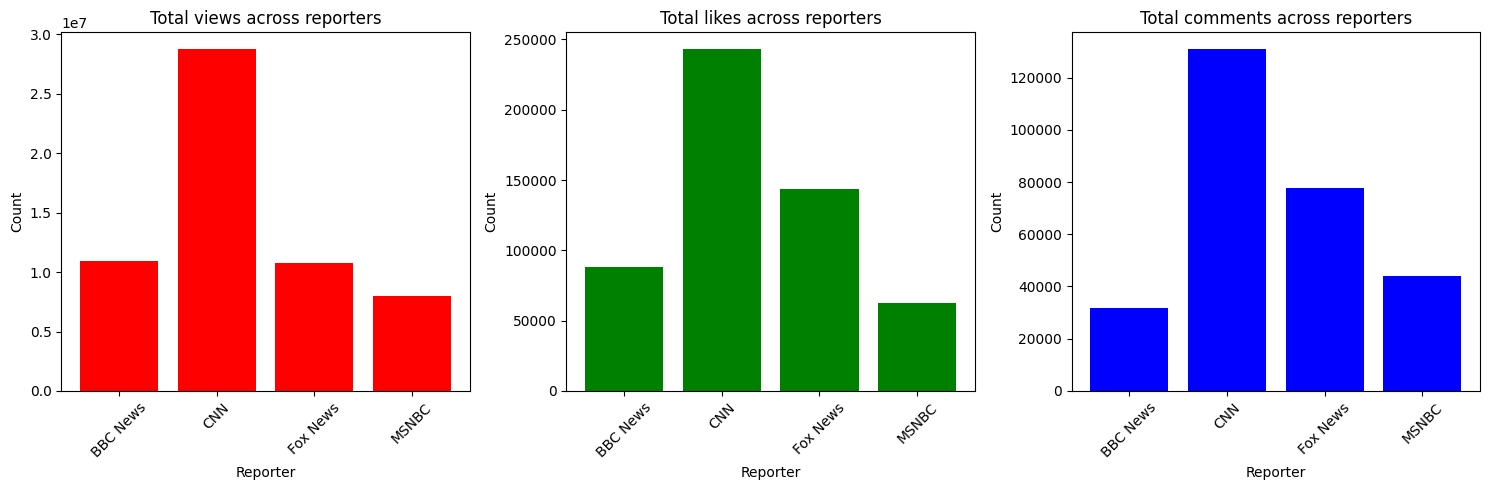

In [15]:

# Calculating the total views, likes, and comments for each channel
grouped_data = videos.groupby('channel_title')[['view_count','like_count','comment_count']].sum().reset_index()
grouped_data.head()


# Here i create the plot
fig,axis = plt.subplots(1,3, figsize =(15,5))

#Create the list, titles, and colors that we want.

#This can also be done with list conversion.
columns = ['view_count', 'like_count', 'comment_count']
titles = ['Total views across reporters', 'Total likes across reporters', 'Total comments across reporters']
colors = ['red', 'green', 'blue']


# Now wen want to plot out data
for i, col in enumerate(columns):
    axis[i].bar(grouped_data['channel_title'], grouped_data[col], color=colors[i])
    axis[i].set_title(titles[i])
    axis[i].set_xlabel('Reporter')
    axis[i].set_ylabel('Count')
    axis[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [16]:
grouped_data.head()

,channel_title,view_count,like_count,comment_count
0,BBC News,10934026,88157,31787
1,CNN,28726808,242851,130763
2,Fox News,10729554,143640,77532
3,MSNBC,7994186,62616,43843


##### E.1.3. How has the number of comments changed over time? Use visualization to answer this question and annotate at least three major events related to Covid-19 (e.g., WHO declares pandemic) on your plot. Additionally, analyze the plot and try to identify any relationship between these events and the changes in the number of comments; discuss your observations.

In [17]:
# Write your code here:

# Create a figure and an axes object 

# Group the comments by week 

# Plot comments_by_week 

# Annonate the major events on the plot ..

# Customize and display the plot

##### E.1.4. How are the parent comments' likes distributed across different news publishers (channels)? Visualize the distributions using a violin plot and discuss your observations.

* A violin plot is a type of data visualization that combines the features of a box plot and a kernel density plot. It is used to show the distribution of a dataset, and provides information about the underlying data. The thickness of a violin plot represents the density of data points in that area of the plot. Thicker areas indicate a higher density of data points, while thinner areas indicate a lower density of data points. 

In [18]:
# Write your code here:

# Assign the `videos_comments` DataFrame to a new variable `df`

# Create a new column in the `df` DataFrame to indicate whether a comment is a parent or not

# Filter out non-parent comments using a boolean mask created from the `is_parent` column

# Create a violin plot of the data with a limited y-axis range

# Customize and display the plot

##### E.1.5. How are the comment replies distributed over time for different news publishers (channels)? Visualize the distributions using probability density functions.

In [19]:
# Write your code here:

# Group the comments by channel title

# Create a figure and axis object using the `subplots()` method 

# Loop through the channels and plot the probability density function for each

# Customize and display the plot

##### E.1.6. What are the top 5 videos with the highest ratio of likes to views? Display the URLs of these videos as well as their corresponding like counts, view counts, and like to view ratios. Discuss your observations. 

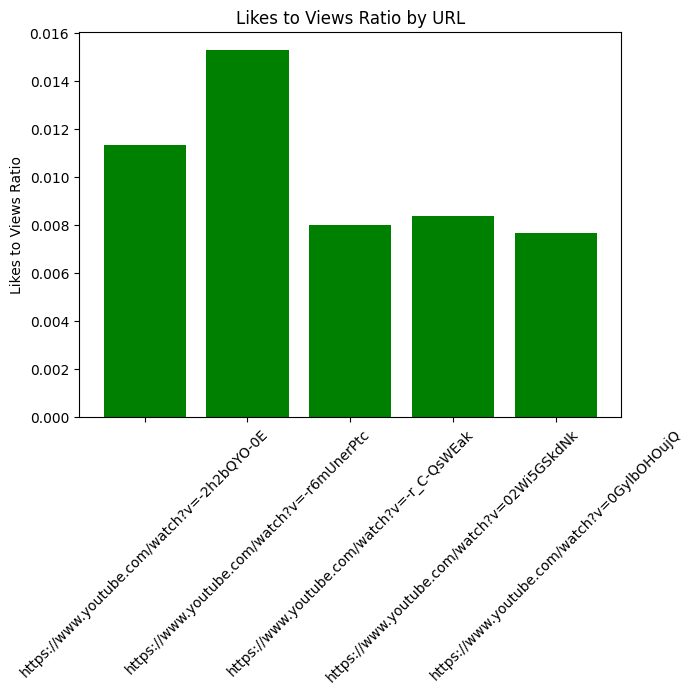

In [20]:
# Write your code here:
# Group the urls by their view counts and like counts
grouped = videos.groupby('url')[['view_count', 'like_count']].sum().reset_index()

# Remove some obvious outliers
grouped = grouped[(grouped['like_count'] > 5) & (grouped['view_count'] > 300)]

# Here i calculate the likes to view ratio
grouped['likes:views'] = grouped['like_count'] / grouped['view_count']


#Here i sort the values in descending order so i can grab the Top 5
grouped.sort_values(by = 'likes:views', ascending=False)



#Here i selected the top 5 videos with the highest likes to views
top_5 = grouped.head(5)


# Here i create the plots
fig, axis = plt.subplots(1, figsize=(7, 5))

axis.bar(top_5['url'], top_5['likes:views'], color='green')
axis.set_title('Likes to Views Ratio by URL')
#axis.set_xlabel('URL')
axis.set_ylabel('Likes to Views Ratio')
axis.tick_params(axis='x', rotation=45)


plt.show()

In [21]:
top_5.head()

,url,view_count,like_count,likes:views
0,https://www.youtube.com/watch?v=-2h2bQYO-0E,98516,1114,0.011308
1,https://www.youtube.com/watch?v=-r6mUnerPtc,75642,1155,0.015269
2,https://www.youtube.com/watch?v=-r_C-QsWEak,165355,1323,0.008001
3,https://www.youtube.com/watch?v=02Wi5GSkdNk,903124,7549,0.008359
4,https://www.youtube.com/watch?v=0GylbOHOujQ,992560,7582,0.007639


##### E.1.7. Is there any relationship between the average length of the comments on a video and its like count? Visualize the relationship and discuss your observations. Exclude from your analysis the videos with no comments.

In [22]:
# Write your code here:

# Calculate the average comment length and like count for each video 

# Plot the relationship between average comment length and like count

# Customize and display the plot

#### E.2. Analyze the Videos and Comments - Part 2
* Choose **(only) 1** of the following questions (E.2.1 to E.2.7) and write Python code to answer them. 

##### E.2.1. What are the top 10 comments with the most replies? For each comment, display the Channel Title, Comment text, and the total number of replies that comment has received. Discuss your observations.

In [23]:
# Write your code here:

# Get the total number of replies to each comment

# Select comments without a parent comment_id (i.e., root comments)

# Get the top 10 root comments with the most replies

# Display the 'comment_text', 'channel_title', and 'reply_count' of the top 10 root comments


##### E.2.2. How does the average length of the comments (in characters) on a video vary with its duration? Analyze this for different news publishers (channels) using visualizations and discuss your observations.

In [24]:
# Write your code here:

# Create a new DataFrame containing only the comments data

# Add a new column to the DataFrame to store the length of each comment

# Group the comments DataFrame by video_id and calculate the mean comment length for each video

# Merge the videos DataFrame with grouped comments DataFrame 

# Create subplots for each channel

# Customize and display the subplots

##### E.2.3. How has the total number of comments per news publisher (channel) changed over months? Create a visualization to investigate this and discuss your observations. Make sure the outliers have been removed. 

In [25]:
# Write your code here:

# Convert the published_at column to a datetime object and extract year and month

# Calculate the total number of comments per channel_title and year_month

# Remove outliers

# Create a pivot table to group the data by year_month and channel_title

# Create, customize, and display the plot

##### E.2.4. How does the distribution of number of comments and likes vary across different news publishers (channels)? Use visualization to answer this question; discuss your observations. Make sure the outliers have been removed from the visualization. 

In [26]:
# Write your code here:

# Remove outliers

# Create a figure with two subplots

# Plot the distribution of comments and likes per news publisher

# Customize and display the plots

##### E.2.5. Is there a relationship between the duration of a video and receiving a below-average number of comments? Use visualization to answer this question; discuss your observations.

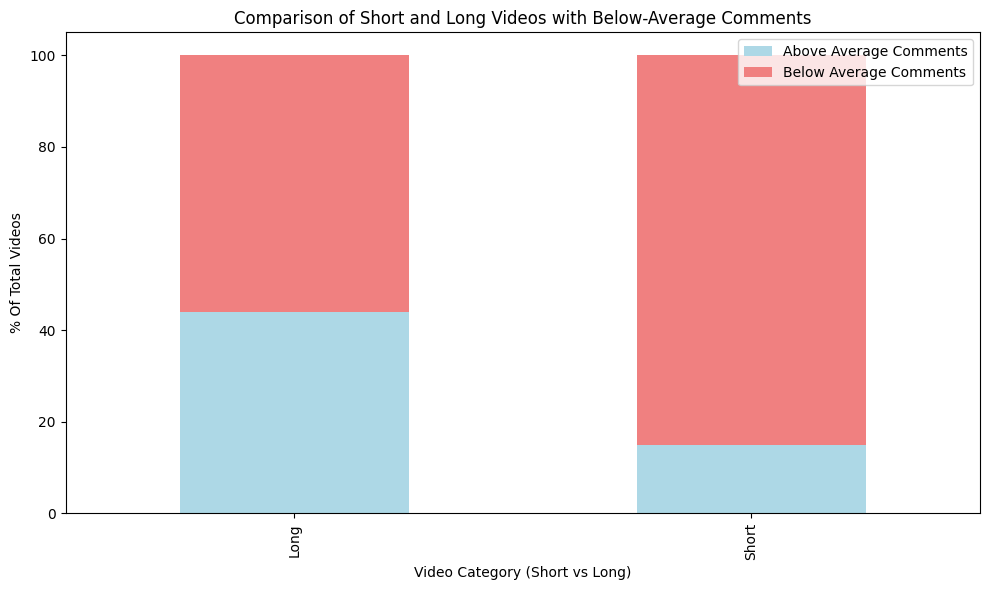

In [27]:

# Here i calculate the average ammount of comments between the videos
average_comments = videos['comment_count'].mean()

# Here i calculate the average duration of each video which we will use later.
median_duration = videos['duration'].median()

# I then create a column with videos below average comments
videos['below_average_comments'] = videos['comment_count'] < average_comments

# Here i divide the videos into different catogories, short and long.
videos['video_category'] = ['Short' if duration < median_duration else 'Long' for duration in videos['duration']]

# Here i calculate how much each category has
category_counts = videos.groupby(['video_category', 'below_average_comments']).size().unstack(fill_value=0)

#Now we plot the results
fig, ax = plt.subplots(figsize=(10, 6))

category_counts.plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'lightcoral'])


ax.set_title('Comparison of Short and Long Videos with Below-Average Comments')
ax.set_xlabel('Video Category (Short vs Long)')
ax.set_ylabel('% Of Total Videos')
ax.legend(['Above Average Comments', 'Below Average Comments'])


plt.tight_layout()
plt.show()




##### E.2.6. For a comment, Response Time (in seconds) is defined as the period between the time the comment is posted and the time the video is published. Use visualization to compare the distribution of the comment response times for different news publishers (channels). How does the median response time and interquartile range vary across the news publishers? discuss your observations. 

In [28]:
# Write your code here:

# Calculate response time for each comment

# Visualize the median, interquartile range, and outliers for each channel

# Customize and display the plot

##### E.2.7. Compare the average number of videos published per week across different news publishers (channels)? Use visualization and discuss your observations. 

In [29]:
# Write your code here:

# Group by channel_title and resample by week, counting the number of videos

# Calculate the average number of videos published per week for each channel

# Customize and display the plot

In [30]:
print(f" videos dataframe: {videos.dtypes} \n")
print(f" comments dataframe: {comments.dtypes} \n")
print(f"videos_comments dataframe: {pd.merge(videos,comments, how='inner', on ='video_id').dtypes} \n")

 videos dataframe: video_id                          object
channel_id                        object
video_title                       object
channel_title                     object
category_name                     object
live_upcoming_none                object
view_count                         int64
like_count                         int64
dislike_count                      int64
comment_count                      int64
published_at              datetime64[ns]
tags                              object
duration                           int64
definition                        object
caption                             bool
thumbnail                         object
url                               object
published_at_week                 object
published_at_month                object
published_at_year                 object
below_average_comments              bool
video_category                    object
dtype: object 

 comments dataframe: video_id                      object
comme